# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Let's Load the Dataset

In [2]:
Train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
Train_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
Test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
Test_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#checking unique value for every column
Train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset for Train Data

In [6]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
Train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#moving the categorical attributes
cat_col=[]
for x in Train_data.dtypes.index:
    if Train_data.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')


In [10]:
#observing unique values
for col in cat_col:
    print(col)
    print(Train_data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
#filling the missing values with average value of attribute
item_weight_mean=Train_data.pivot_table(values="Item_Weight",index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
Train_data['Item_Weight'].isnull().sum()

1463

In [13]:
miss_bool = Train_data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i, item in enumerate(Train_data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            Train_data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            Train_data['Item_Weight'][i] = np.mean(Train_data['Item_Weight'])

In [15]:
Train_data['Item_Weight'].isnull().sum()

0

In [16]:
outlet_size_mode = Train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
miss_bool = Train_data['Outlet_Size'].isnull()
Train_data.loc[miss_bool, 'Outlet_Size'] = Train_data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [18]:

Train_data['Outlet_Size'].isnull().sum()

0

In [19]:
sum(Train_data['Item_Visibility']==0)

526

In [20]:
# replace zeros with mean
Train_data.loc[:,'Item_Visibility'].replace([0], [Train_data['Item_Visibility'].mean()], inplace=True)

In [21]:

sum(Train_data['Item_Visibility']==0)

0

In [22]:
sum(Train_data['Item_MRP']==0)

0

In [23]:
# combine item fat content
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
Train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
Train_data['New_Item_Type'] = Train_data['Item_Identifier'].apply(lambda x: x[:2])
Train_data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [25]:
Train_data['New_Item_Type'] = Train_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
Train_data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [26]:
Train_data.loc[Train_data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Train_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [27]:
column = Train_data["Outlet_Establishment_Year"]
max_value = column.max()
max_value

2009

In [28]:
Train_data['Outlet_Years'] = 2009 - Train_data['Outlet_Establishment_Year']


In [29]:
Train_data['Outlet_Years']

0       10
1        0
2       10
3       11
4       22
        ..
8518    22
8519     7
8520     5
8521     0
8522    12
Name: Outlet_Years, Length: 8523, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train_data['Outlet'] = le.fit_transform(Train_data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    Train_data[col] = le.fit_transform(Train_data[col])

In [31]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,10,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,0,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,10,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,11,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,22,1


# Data Visualization


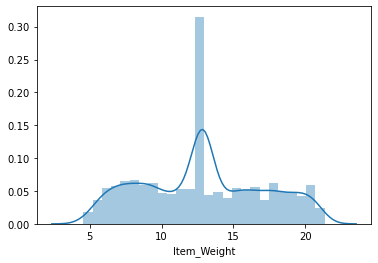

In [32]:
sns.distplot(Train_data['Item_Weight'])

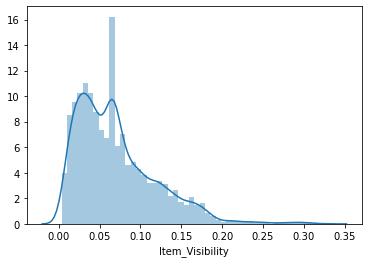

In [33]:

sns.distplot(Train_data['Item_Visibility'])

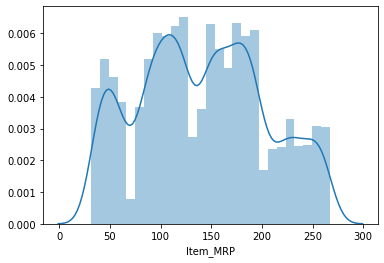

In [34]:
sns.distplot(Train_data['Item_MRP'])

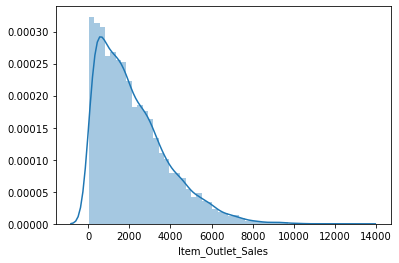

In [36]:
sns.distplot(Train_data['Item_Outlet_Sales'])

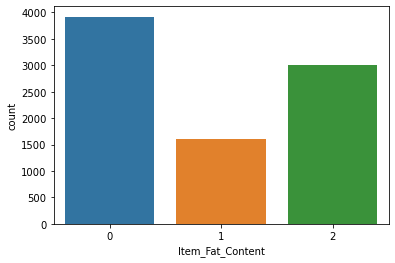

In [37]:
sns.countplot(Train_data["Item_Fat_Content"])

[Text(0, 0, '4'),
 Text(0, 0, '14'),
 Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '0'),
 Text(0, 0, '13'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

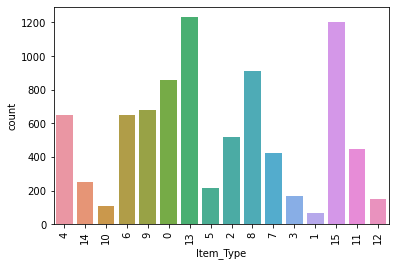

In [38]:
l = list(Train_data['Item_Type'].unique())
chart = sns.countplot(Train_data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

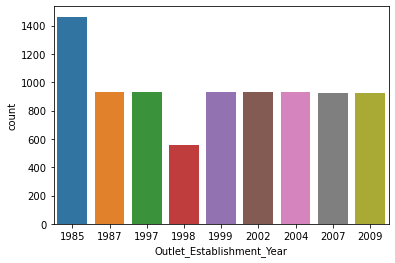

In [39]:
sns.countplot(Train_data['Outlet_Establishment_Year'])

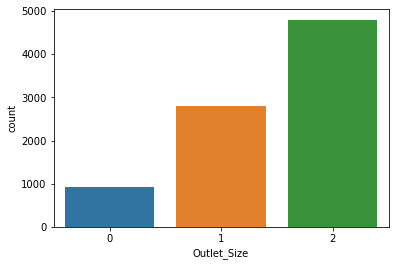

In [40]:
sns.countplot(Train_data['Outlet_Size'])


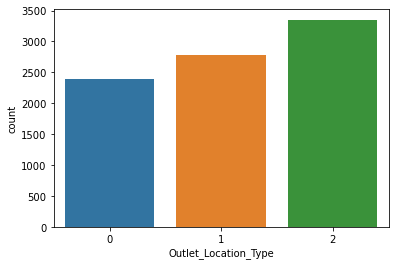

In [41]:
sns.countplot(Train_data['Outlet_Location_Type'])

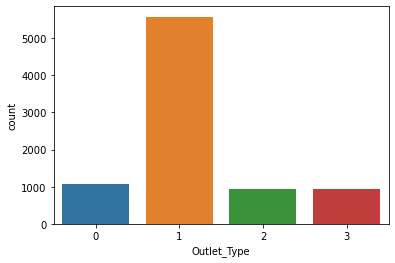

In [42]:

sns.countplot(Train_data['Outlet_Type'])

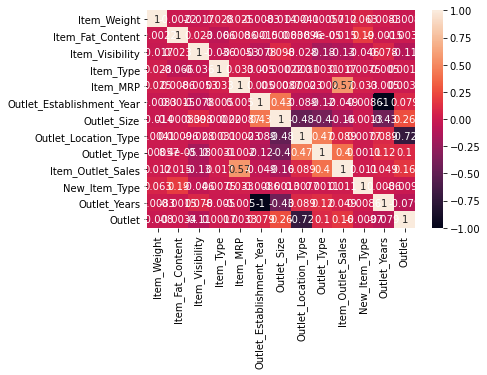

In [43]:
corr = Train_data.corr()
sns.heatmap(corr, annot=True)

In [44]:
Train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,10,9
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,0,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,10,9
3,FDX07,19.200,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,11,0
4,NCD19,8.930,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834,1,22,1
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850,1,7,7
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136,2,5,6
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976,1,0,3


In [45]:
Train_data.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [46]:
Train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,1,10,9
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,0,0,3
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,1,10,9
3,19.200,2,0.066132,6,182.0950,2,2,0,732.3800,1,11,0
4,8.930,1,0.066132,9,53.8614,0,2,1,994.7052,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,1,22,1
8519,8.380,2,0.046982,0,108.1570,2,1,1,549.2850,1,7,7
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,2,5,6
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,1,0,3


In [47]:
collist=Train_data.columns.values
ncol=12
nrows=10

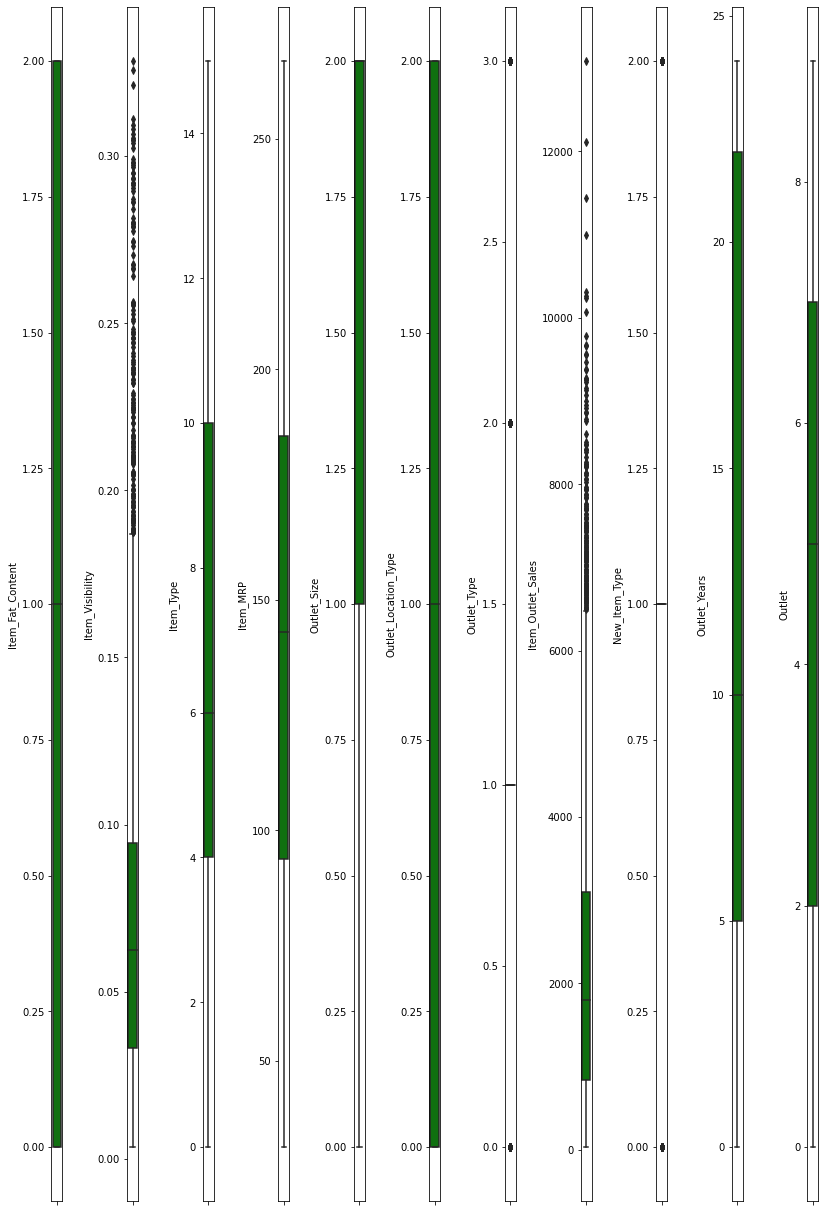

In [48]:
#code for checking the outliers
plt.figure(figsize=(ncol,14*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Train_data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [49]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(Train_data))
z

array([[0.84187169, 0.99781318, 1.11135787, ..., 0.17979501, 0.13954076,
        1.50781338],
       [1.64170589, 1.23694223, 1.04506727, ..., 2.09528612, 1.33410274,
        0.60707075],
       [1.09855449, 0.99781318, 1.09673346, ..., 0.17979501, 0.13954076,
        1.50781338],
       ...,
       [0.53424315, 0.11956453, 0.71867224, ..., 1.73569609, 0.73682175,
        0.45037131],
       [1.33644372, 1.23694223, 1.53896846, ..., 0.17979501, 1.33410274,
        0.60707075],
       [0.45963367, 0.99781318, 0.51981553, ..., 2.09528612, 0.09937163,
        1.15533269]])

In [50]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 8522, 8522, 8522], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [51]:
Train_data_new=Train_data[(z<3).all(axis=1)]

In [52]:
Train_data_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,1,10,9
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,0,0,3
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,1,10,9
3,19.200,2,0.066132,6,182.0950,2,2,0,732.3800,1,11,0
4,8.930,1,0.066132,9,53.8614,0,2,1,994.7052,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,1,22,1
8519,8.380,2,0.046982,0,108.1570,2,1,1,549.2850,1,7,7
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,2,5,6
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,1,0,3


In [53]:
Train_data_new.shape

(8334, 12)

In [54]:
percentage_loss=((8523-8334)/8334)*100
percentage_loss

2.267818574514039

In [55]:
Q1=Train_data.quantile(0.25)
Q3=Train_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Item_Weight                6.6900
Item_Fat_Content           2.0000
Item_Visibility            0.0615
Item_Type                  6.0000
Item_MRP                  91.8172
Outlet_Size                1.0000
Outlet_Location_Type       2.0000
Outlet_Type                0.0000
Item_Outlet_Sales       2267.0490
New_Item_Type              0.0000
Outlet_Years              17.0000
Outlet                     5.0000
dtype: float64


In [56]:
Train_data2=Train_data[~((Train_data<(Q1-1.5*IQR))|(Train_data>(Q3+1.5*IQR))).any(axis=1)]
print(Train_data2.shape)

(3937, 12)


In [57]:
percentage_loss=((8523-3937)/8334)*100
percentage_loss

55.02759779217663

In [58]:
x=Train_data_new.drop('Item_Outlet_Sales',axis=1)
y=Train_data_new['Item_Outlet_Sales']

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [60]:
Train_data_new.skew()

Item_Weight             0.089363
Item_Fat_Content        0.210399
Item_Visibility         0.864331
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Size            -0.855385
Outlet_Location_Type   -0.202747
Outlet_Type             0.957677
Item_Outlet_Sales       0.877845
New_Item_Type           0.111713
Outlet_Years            0.423858
Outlet                 -0.065455
dtype: float64

# LINEAR REGRESSION

In [62]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1,random_state=42)

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression()

In [66]:
lm.coef_

array([  -4.05611529,   24.97187308,  -36.44295127,   -4.27632855,
        915.60164121,   58.5147005 , -179.63774378,  767.6534161 ,
        -12.52027434,  127.41176969,  -13.6863939 ])

In [67]:
lm.intercept_

2135.1362382042335

In [68]:
lm.score(x_train,y_train)

0.5157053587692687

In [69]:
#saving the model
import pickle
filename='Projectbdm.pkl'
pickle.dump(lm, open(filename, 'wb'))

# Now same for the Test data

In [71]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [72]:
#checking unique value for every column
Test_data.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [73]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [74]:
Test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [75]:
#moving the categorical attributes
cat_col1=[]
for x in Test_data.dtypes.index:
    if Test_data.dtypes[x]=='object':
        cat_col1.append(x)
cat_col1

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [76]:
cat_col1.remove('Item_Identifier')
cat_col1.remove('Outlet_Identifier')

In [77]:
for col1 in cat_col1:
    print(col1)
    print(Test_data[col1].value_counts())
    print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [78]:
#filling the missing values with average value of attribute
item_weight_mean=Test_data.pivot_table(values="Item_Weight",index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [79]:
Test_data['Item_Weight'].isnull().sum()

976

In [80]:
miss_bool = Test_data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [81]:
for i, item in enumerate(Test_data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            Test_data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            Test_data['Item_Weight'][i] = np.mean(Train_data['Item_Weight'])

In [82]:
Test_data['Item_Weight'].isnull().sum()

0

In [83]:
outlet_size_mode = Test_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [84]:
miss_bool = Test_data['Outlet_Size'].isnull()
Test_data.loc[miss_bool, 'Outlet_Size'] = Test_data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [85]:

Test_data['Outlet_Size'].isnull().sum()

0

In [86]:
sum(Test_data['Item_Visibility']==0)

353

In [87]:
# replace zeros with mean
Test_data.loc[:,'Item_Visibility'].replace([0], [Test_data['Item_Visibility'].mean()], inplace=True)

In [88]:

sum(Test_data['Item_Visibility']==0)

0

In [89]:
sum(Test_data['Item_MRP']==0)

0

In [90]:
# combine item fat content
Test_data['Item_Fat_Content'] = Test_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
Test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [91]:
Test_data['New_Item_Type'] = Test_data['Item_Identifier'].apply(lambda x: x[:2])
Test_data['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [92]:
Test_data['New_Item_Type'] = Test_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
Test_data['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [93]:
Test_data.loc[Test_data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Test_data['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [94]:
column = Test_data["Outlet_Establishment_Year"]
max_value = column.max()
max_value

2009

In [95]:
Test_data['Outlet_Years'] = 2009 - Test_data['Outlet_Establishment_Year']


In [96]:
Test_data['Outlet_Years']

0       10
1        2
2       11
3        2
4       24
        ..
5676    12
5677     0
5678     7
5679     2
5680     7
Name: Outlet_Years, Length: 5681, dtype: int64

In [97]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,10
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,2
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumable,11
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,2
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,24


In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Test_data['Outlet'] = le.fit_transform(Test_data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    Test_data[col] = le.fit_transform(Test_data[col])

In [99]:
Test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,1,10,9
1,FDW14,8.300000,2,0.038428,4,87.3198,OUT017,2007,2,1,1,1,2,2
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,2,2,0,2,11,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,2,1,1,1,2,2
4,FDY38,12.857645,2,0.118599,4,234.2300,OUT027,1985,1,2,3,1,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,13,141.3154,OUT046,1997,2,0,1,1,12,8
5677,FDD47,7.600000,2,0.142991,15,169.1448,OUT018,2009,1,2,2,1,0,3
5678,NCO17,10.000000,1,0.073529,8,118.7440,OUT045,2002,2,1,1,2,7,7
5679,FDJ26,15.300000,2,0.065684,3,214.6218,OUT017,2007,2,1,1,1,2,2


In [100]:
Test_data.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [101]:
Test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007565,13,107.8622,1,0,1,1,10,9
1,8.300000,2,0.038428,4,87.3198,2,1,1,1,2,2
2,14.600000,1,0.099575,11,241.7538,2,2,0,2,11,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,1,2,2
4,12.857645,2,0.118599,4,234.2300,1,2,3,1,24,5
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1,1,12,8
5677,7.600000,2,0.142991,15,169.1448,1,2,2,1,0,3
5678,10.000000,1,0.073529,8,118.7440,2,1,1,2,7,7
5679,15.300000,2,0.065684,3,214.6218,2,1,1,1,2,2


In [102]:
collist1=Test_data.columns.values
ncol1=11
nrows1=10

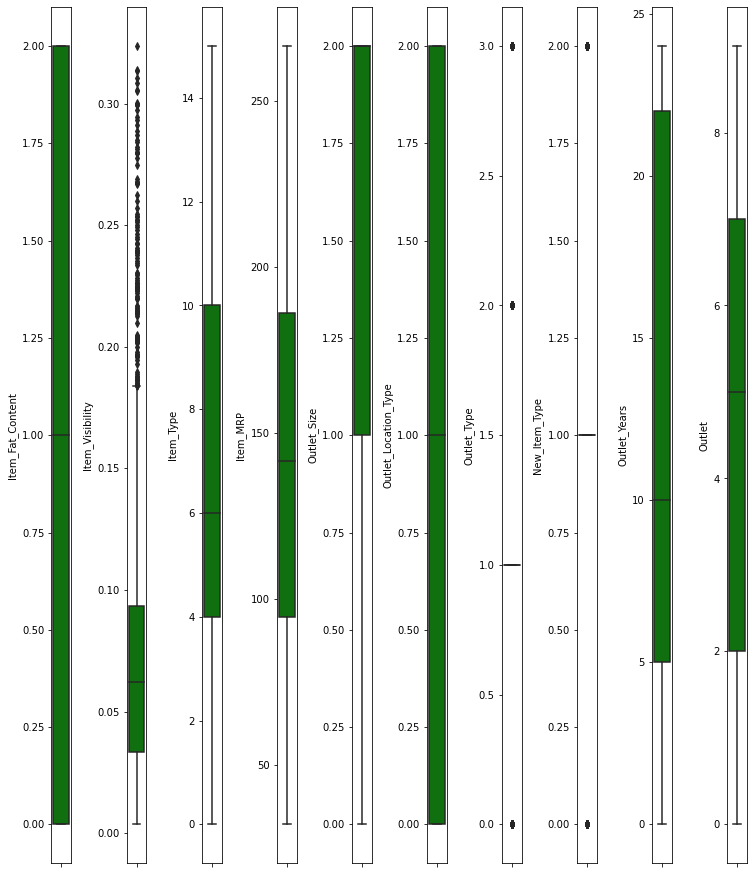

In [111]:
#code for checking the outliers
plt.figure(figsize=(ncol1,11*ncol1))
for i in range(1,len(collist1)):
    plt.subplot(nrows,ncol1,i+1)
    sns.boxplot(Test_data[collist1[i]],color='green',orient='v')
    plt.tight_layout()

In [112]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(Test_data))
z

array([[1.89070674, 1.00709156, 1.2853951 , ..., 0.19187262, 0.13989058,
        1.50768894],
       [1.04197905, 1.23084592, 0.64760285, ..., 0.19187262, 1.09551169,
        0.95974865],
       [0.44203063, 0.11187718, 0.61602774, ..., 1.72381871, 0.02043794,
        1.66473082],
       ...,
       [0.64153199, 0.11187718, 0.07777015, ..., 1.72381871, 0.4982485 ,
        0.80270677],
       [0.60692059, 1.23084592, 0.08434356, ..., 0.19187262, 1.09551169,
        0.95974865],
       [0.75931054, 1.23084592, 0.72235612, ..., 0.19187262, 0.4982485 ,
        0.80270677]])

In [113]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 5680, 5680, 5680], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))


In [114]:
Test_data_new=Test_data[(z<3).all(axis=1)]

In [115]:
Test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007565,13,107.8622,1,0,1,1,10,9
1,8.300000,2,0.038428,4,87.3198,2,1,1,1,2,2
2,14.600000,1,0.099575,11,241.7538,2,2,0,2,11,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,1,2,2
4,12.857645,2,0.118599,4,234.2300,1,2,3,1,24,5
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1,1,12,8
5677,7.600000,2,0.142991,15,169.1448,1,2,2,1,0,3
5678,10.000000,1,0.073529,8,118.7440,2,1,1,2,7,7
5679,15.300000,2,0.065684,3,214.6218,2,1,1,1,2,2


In [116]:
Test_data_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007565,13,107.8622,1,0,1,1,10,9
1,8.300000,2,0.038428,4,87.3198,2,1,1,1,2,2
2,14.600000,1,0.099575,11,241.7538,2,2,0,2,11,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,1,2,2
4,12.857645,2,0.118599,4,234.2300,1,2,3,1,24,5
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1,1,12,8
5677,7.600000,2,0.142991,15,169.1448,1,2,2,1,0,3
5678,10.000000,1,0.073529,8,118.7440,2,1,1,2,7,7
5679,15.300000,2,0.065684,3,214.6218,2,1,1,1,2,2


In [117]:
percentage_loss=((5681-5595)/5681)*100
percentage_loss

1.51381798979053

In [118]:
x=Test_data_new

In [119]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [120]:
Test_data_new.skew()

Item_Weight             0.122760
Item_Fat_Content        0.201788
Item_Visibility         0.858037
Item_Type               0.091546
Item_MRP                0.133440
Outlet_Size            -0.839133
Outlet_Location_Type   -0.212803
Outlet_Type             0.954936
New_Item_Type           0.118924
Outlet_Years            0.412117
Outlet                 -0.070298
dtype: float64

# Model Training

In [121]:
#lINEAR REGRESSION

In [122]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [123]:
x_test=Test_data_new

In [130]:
y_pred = lm.predict(x_test)

In [125]:
y_pred

array([102718.4992282 ,  83003.03623584, 224534.63929015, ...,
       112280.94017102, 199535.84659074,  76679.85258347])

In [126]:
result = pd.DataFrame()

In [127]:
result["Item_Outlet_Sales"] = y_pred
result = result.sort_index()

In [128]:
result

,Item_Outlet_Sales
0,102718.499228
1,83003.036236
2,224534.639290
3,144918.673079
4,221552.002580
...,...
5590,133766.631447
5591,158135.120641
5592,112280.940171
5593,199535.846591
